### ODE system

Linear ODE

$$u'=Au+f(u),\quad A=\begin{pmatrix} -1000 & 1\\ 0 & -0.1\end{pmatrix}.$$

$$f(u)=(u_2^2,u_1^2)^T, \quad u(0)=(0.0,1.0)^T.$$

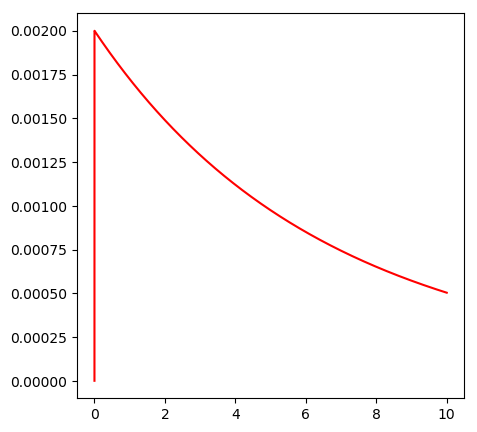

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002FA3FB00>

In [1]:
using LinearAlgebra

function rhs(u)
    return [u[2]^2;u[1]^2]
end
    
function ForwardEuler(N,T,u0,A,func)
    dt = T/N
    u = zeros(2,N+1)
    t = zeros(N+1)
    u[:,1] = u0
    t = collect(0:N)*dt
    for i = 1 : N
        f = func(u[:,i])    
        u[:,i+1] = u[:,i] + A * dt * u[:,i] + dt * f
    end
    return u
end

u0 = [0.0,1.0]
A = [-1000.0 1.0
0.0 -0.1]
T  = 10.0
dt = 0.001
N  = round(Int64,T/dt)
t  = collect(0:N)*dt
uForwardEuler = ForwardEuler(N,T,u0,A,rhs)


using PyPlot
figure(1,figsize=(5,5))
plot(t,vec(uForwardEuler[1,:]),"r-")

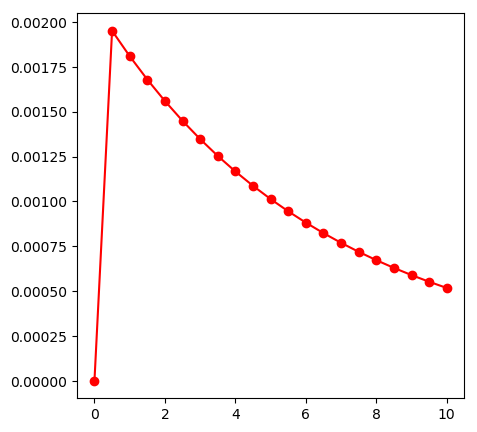

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002FADA518>

In [2]:

function ETD1(N,T,u0,A,func)
    I_2 = Matrix(1.0I, 2,2)
    dt = T/N
    u = zeros(2,N+1)
    t = zeros(N+1)
    u[:,1] = u0
    t = collect(0:N)*dt
    eA = exp(A*dt)
    invA = inv(A)
    for i = 1 : N
        f = func(u[:,i])    
        u[:,i+1] = eA*u[:,i] + (eA-I_2)*invA*f
    end
    return u
end

u0 = [0.0,1.0]
A = [-1000.0 1.0
0.0 -0.1]
T  = 10.0
dt = 0.5
N  = round(Int64,T/dt)
t  = collect(0:N)*dt
uETD1 = ETD1(N,T,u0,A,rhs)

using PyPlot
figure(1,figsize=(5,5))
plot(t,vec(uETD1[1,:]),"r-o")

### Stability region of ETD1

Define 
$$w=c\Delta t,z=\lambda \Delta t,$$ 
then RAS for ETD1 is defined as 

$$\{z\in\mathbb{C}: |e^w + z (e^w-1)/w|\le 1.$$

If $Re w<0$, $e^w\approx 0$, and essentially $|z|<|w|$ will be stable: huge stability region.

In [3]:
using PyPlot


# Old version does not have ndgrid
function ndgrid(v1::AbstractVector{T}, v2::AbstractVector{T}) where T
    m, n = length(v1), length(v2)
    v1 = reshape(v1, m, 1)
    v2 = reshape(v2, 1, n)
    (repeat(v1, 1, n), repeat(v2, m, 1))
end

function RASETD1(L,w)
    N=201
    x1d=LinRange(-L,L,N)
    X,Y=ndgrid(x1d,x1d)
    Z=zeros(size(X))
    for j = 1 : prod(size(X))
        lam = X[j] + im*Y[j]
        R = exp.(w)+lam*(exp.(w)-1.0)/w;
        if(abs(R)<=1.0)
            Z[j] = 1
        else
            Z[j] = 0
        end
    end
    return X,Y,Z
end 

RASETD1 (generic function with 1 method)

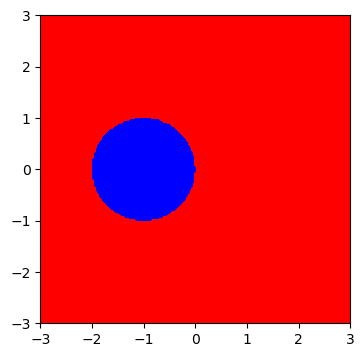

PyObject <matplotlib.contour.QuadContourSet object at 0x0000000036E354A8>

In [4]:
# Small |w|

X,Y,Z=RASETD1(3.0,-0.001)
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))

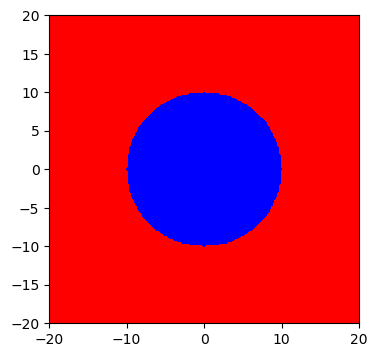

PyObject <matplotlib.contour.QuadContourSet object at 0x0000000036E94BE0>

In [5]:
# Large |w|

X,Y,Z=RASETD1(20.0,-10.0)
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))

### Stability region for IMEX1

Define 
$$w=c\Delta t,z=\lambda \Delta t,$$ 
then RAS for IMEX1 is defined as 

$$\{z\in\mathbb{C}: |(1+z)/(1-w)|\le 1.$$

$|1+z|<|1-w|$ will be stable: huge stability region if $-w\gg 1$.

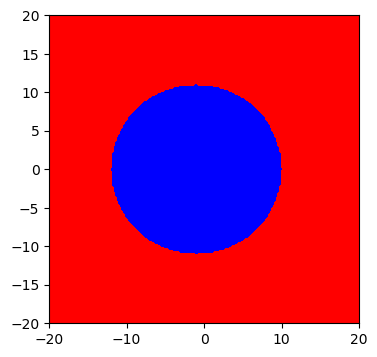

PyObject <matplotlib.contour.QuadContourSet object at 0x0000000037EC2438>

In [6]:
function RASIMEX1(L,w)
    N=201
    x1d=LinRange(-L,L,N)
    X,Y=ndgrid(x1d,x1d)
    Z=zeros(size(X))
    for j = 1 : prod(size(X))
        lam = X[j] + im*Y[j]
        R = (1.0+lam)/(1.0-w)
        if(abs(R)<=1.0)
            Z[j] = 1
        else
            Z[j] = 0
        end
    end
    return X,Y,Z
end 

# Large |w|

X,Y,Z=RASIMEX1(20.0,-10.0)
figure(figsize=(4,4))
contourf(X,Y,Z,[0.00,0.99,1.01],colors=("r","b"))